<a href="https://www.kaggle.com/code/cs21b2033arpitsingh/brain-tumor-ipynb?scriptVersionId=182388218" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
train_images=[]
masked_images=[]

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        k=os.path.join(dirname,filename)
        if dirname=='/kaggle/input/brain-tumor-segmentation/images':
            train_images.append(filename)
        if dirname=="/kaggle/input/brain-tumor-segmentation/masks":
            masked_images.append(filename)
    


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:


for i in range(len(train_images)):
    train_images[i]=int(train_images[i].split(".")[0])

train_images.sort()






In [3]:

for i in range(len(masked_images)):
    masked_images[i]=int(masked_images[i].split(".")[0])

masked_images.sort()



In [4]:
#now we will prepare the link
for i in range(len(train_images)):
    l=str(train_images[i])
    train_images[i]='/kaggle/input/brain-tumor-segmentation/images/'+l+'.png'
    



In [5]:
#now we will prepare the link
for i in range(len(masked_images)):
    l=str(masked_images[i])
    masked_images[i]='/kaggle/input/brain-tumor-segmentation/masks/'+l+'.png'
    


(512, 512)


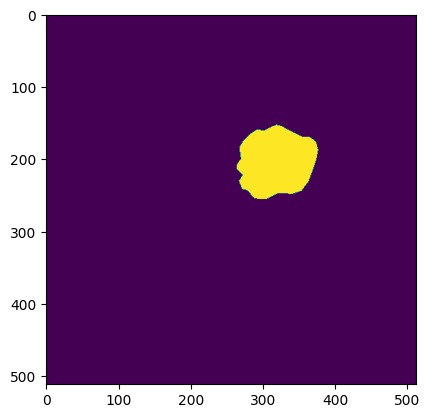

(512, 512)


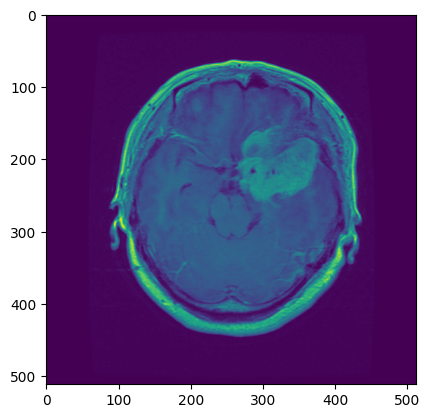

In [6]:
#now we have prepared the paths for the images 
#now lets see the  images


l=train_images
m=masked_images

import matplotlib.pyplot as plt 
x=plt.imread(masked_images[1])
print(x.shape)
plt.imshow(x)
plt.show()

y=plt.imread(train_images[1])
print(y.shape)
plt.imshow(y)
plt.show()


In [7]:
#print(m)



'''
#now lets prepare the test and the train set 
train_set=train_images[:300]
train_mask_set=masked_images[:300]

test_set=train_images[300:350]
test_mask_set=masked_images[300:350]
'''

'\n#now lets prepare the test and the train set \ntrain_set=train_images[:300]\ntrain_mask_set=masked_images[:300]\n\ntest_set=train_images[300:350]\ntest_mask_set=masked_images[300:350]\n'

In [8]:
#now we make the unet model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers  import Conv2D,MaxPooling2D,Input,UpSampling2D,concatenate
from keras.models import Model
from keras.utils import plot_model

     

2024-06-09 12:57:33.399844: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-09 12:57:33.399944: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-09 12:57:33.507886: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
#now here we use the keras functional api to create the U-net architecture

input= Input(shape=(512,512,1))

#now we code the encoder part
s1=Conv2D(64,3,activation='relu',padding='same')(input)
s1_1=Conv2D(64,3,activation='relu',padding='same')(s1)
#then we use the maxpooling layer to downsample our input shape

p1=MaxPooling2D(pool_size=(2,2))(s1_1)

#now we again use the convolutional layers to find out the features
s2=Conv2D(128,3,activation='relu',padding='same')(p1)
s2_1=Conv2D(128,3,activation='relu',padding='same')(s2)

#use the maxpool layer
p2=MaxPooling2D(pool_size=(2,2))(s2_1)


#now we again use the convolutional layers to find out the features
s3=Conv2D(256,3,activation='relu',padding='same')(p2)
s3_1=Conv2D(256,3,activation='relu',padding='same')(s3)

#use the maxpool layer
p3=MaxPooling2D(pool_size=(2,2))(s3_1)


#now we again use the convolutional layers to find out the features
s4=Conv2D(512,3,activation='relu',padding='same')(p3)
s4_1=Conv2D(512,3,activation='relu',padding='same')(s4)

#use the maxpool layer
p4=MaxPooling2D(pool_size=(2,2))(s4_1)


#now we again use the convolutional layers to find out the features
b1=Conv2D(1024,3,activation='relu',padding='same')(p4)
b1_1=Conv2D(1024,3,activation='relu',padding='same')(b1)
#this was the last vector
#now we move to the decoder part


#this is the decoder part
#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c1=UpSampling2D(size=(2,2))(b1_1)
#we now give it to the convolutional layer
d1=Conv2D(512,2,activation='relu',padding='same')(c1)
d1=concatenate([s4_1,d1])
d1_1=Conv2D(512,3,activation='relu',padding='same')(d1)
d1_2=Conv2D(512,3,activation='relu',padding='same')(d1_1)


#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c2=UpSampling2D(size=(2,2))(d1_2)
#we now give it to the convolutional layer
d2=Conv2D(256,2,activation='relu',padding='same')(c2)
d2=concatenate([s3_1,d2])
d2_1=Conv2D(256,3,activation='relu',padding='same')(d2)
d2_2=Conv2D(256,3,activation='relu',padding='same')(d2_1)


#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c3=UpSampling2D(size=(2,2))(d2_2)
#we now give it to the convolutional layer
d3=Conv2D(128,2,activation='relu',padding='same')(c3)
d3=concatenate([s2_1,d3])
d3_1=Conv2D(128,3,activation='relu',padding='same')(d3)
d3_2=Conv2D(128,3,activation='relu',padding='same')(d3_1)



#we first upsample the part and then give it to the convolutional layer (where we also try to decrese the number of filters)
c4=UpSampling2D(size=(2,2))(d3_2)
#we now give it to the convolutional layer
d4=Conv2D(64,2,activation='relu',padding='same')(c4)
d4=concatenate([s1_1,d4])
d4_1=Conv2D(64,3,activation='relu',padding='same')(d4)
d4_2=Conv2D(64,3,activation='relu',padding='same')(d4_1)


#we now give it to the convolutional layer
d5=Conv2D(2,3,activation='relu',padding='same')(d4_2)
out=Conv2D(1,1,activation='sigmoid',padding='same')(d5)




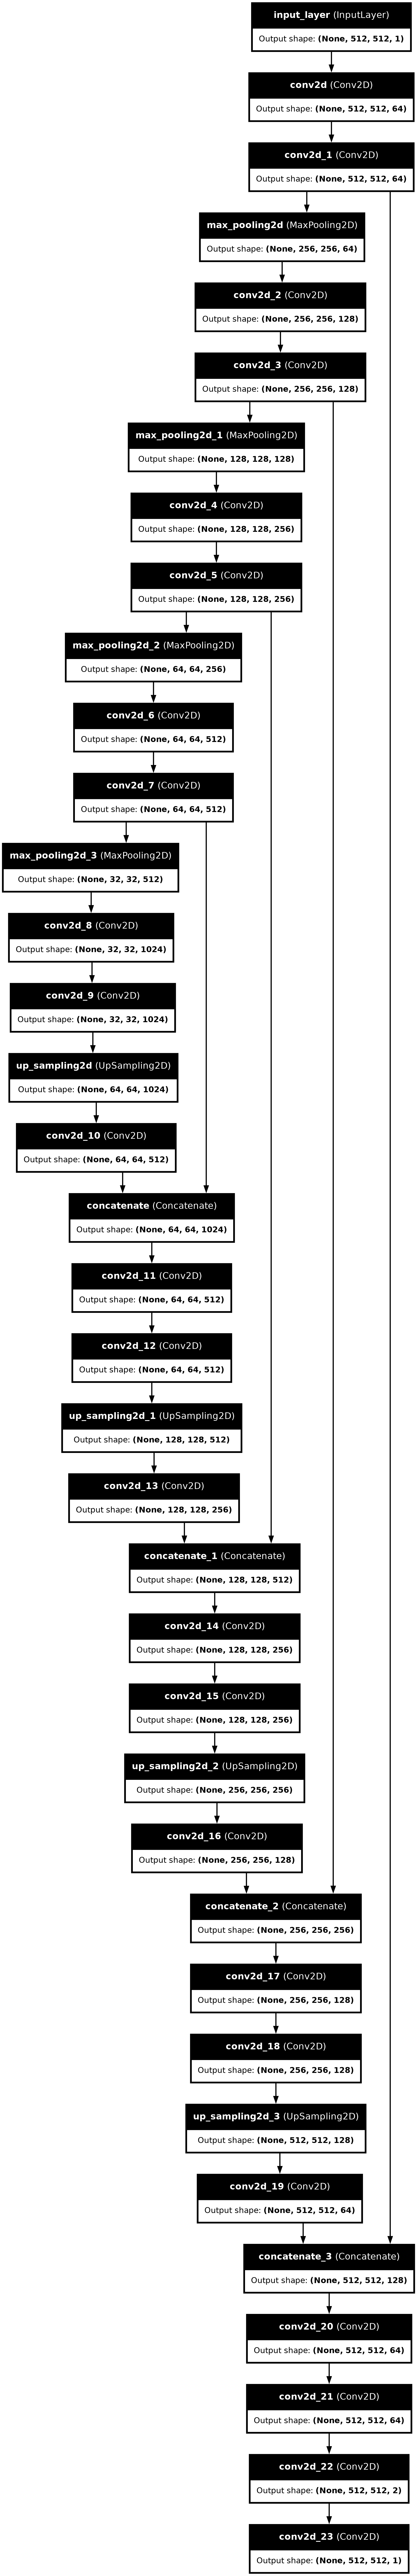

In [11]:
#we now try to check for the decoder part also
model=Model(inputs=input,outputs=out)
plot_model(model,show_shapes=True,show_layer_names=True)

In [12]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 512, 512,  │        640 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 512, 512,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 256, 256,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 256, 256,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 256, 256,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 128, 128,  │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 128, 128,  │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 128, 128,  │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 64, 64,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 64, 64,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 64, 64,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 32, 32,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 32,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 32, 32,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 64, 64,    │          0 │ conv2d_9[0][0]    │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 64, 64,    │  2,097,664 │ up_sampling2d[0]

 Total params: 31,031,685 (118.38 MB)

 Trainable params: 31,031,685 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
train_set=[]
train_set_masked=[]



for i in range(10):
    train_set.append(l[i])
    train_set_masked.append(m[i])
    
    


In [14]:
print(len(train_set))
print(len(train_set_masked))



10
10


In [15]:
test_set=[]
test_set_masked=[]

for i in range(10,15):
    test_set.append(l[i])
    test_set_masked.append(m[i])
print(len(test_set))
print(len(test_set_masked))




5
5


In [16]:
train_set_image=[]
train_masked_set_image=[]

test_set_image=[]
test_masked_set_image=[]

for i in range(len(train_set)):
    x=plt.imread(train_set[i])
    x=np.expand_dims(x, axis=-1)
    train_set_image.append(x)
    
    y=plt.imread(train_set_masked[i])
    y=np.expand_dims(y,axis=-1)
    train_masked_set_image.append(y)
    
    print(x.shape)
    print(y.shape)
    
    


(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)


In [17]:
for j in range(len(test_set)):
    x=plt.imread(test_set[j])
    x=np.expand_dims(x, axis=-1)
    test_set_image.append(x)
    
    y=plt.imread(test_set_masked[j])
    y=np.expand_dims(y,axis=-1)
    test_masked_set_image.append(y)
    
    print(x.shape)
    print(y.shape)


(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)
(512, 512, 1)


In [18]:
#after creating the model we need to compile the model 
model.compile(optimizer='rmsprop',loss='mae',metrics=['accuracy'])


In [19]:
train_set_image=np.asarray(train_set_image)
train_masked_set_image=np.asarray(train_masked_set_image)

test_set_image=np.asarray(test_set_image)
test_masked_set_image=np.asarray(test_masked_set_image)

In [20]:
model.fit(train_set_image,train_masked_set_image,verbose=1,batch_size=1,epochs=3)

Epoch 1/3


2024-06-09 12:58:51.749871: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 262144: 1.24674, expected 0.706489
2024-06-09 12:58:51.749941: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 262145: 2.29621, expected 1.75596
2024-06-09 12:58:51.749951: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 262146: 2.24082, expected 1.70057
2024-06-09 12:58:51.749961: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 262147: 1.8087, expected 1.26845
2024-06-09 12:58:51.749969: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 262148: 2.13502, expected 1.59477
2024-06-09 12:58:51.749977: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 262149: 2.59674, expected 2.05649
2024-06-09 12:58:51.749985: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 262150: 2.16053, expected 1.62028
2024-06-09 12:58:51.

 1/10 ━━━━━━━━━━━━━━━━━━━━ 4:48 32s/step - accuracy: 0.6666 - loss: 0.4996

I0000 00:00:1717937957.723363     109 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


10/10 ━━━━━━━━━━━━━━━━━━━━ 33s 133ms/step - accuracy: 0.8916 - loss: 0.4934
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9835 - loss: 0.0350
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.9786 - loss: 0.0217


In [21]:
model.save('model.h5')

In [22]:
model.evaluate(test_set_image,test_masked_set_image,verbose=1,batch_size=2)

2024-06-09 13:00:06.016700: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 1.8613, expected 1.01645
2024-06-09 13:00:06.016763: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 2.41655, expected 1.57169
2024-06-09 13:00:06.016773: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 2.78238, expected 1.93752
2024-06-09 13:00:06.016781: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 2.22846, expected 1.3836
2024-06-09 13:00:06.016791: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 2.28317, expected 1.43832
2024-06-09 13:00:06.016799: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 3.10425, expected 2.2594
2024-06-09 13:00:06.016807: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 2.59198, expected 1.74712
2024-06-09 13:00:06.016814: E external/local_xla/xla/servi

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 462ms/step - accuracy: 0.9743 - loss: 0.0259


[0.024996574968099594, 0.9751937985420227]